In [3]:
import pandas as pd

df = pd.read_csv('~/rads_dispo_lim_2023_02_23.csv')
df = df.reset_index()
df.head()

,index,CSN,Rads_order_ID,Study,Impression,ED_dispo
0,0,131290418105,674819827,XR CHEST 2 VIEWS,1. Interval increase in perihilar opacities a...,Place in Observation
1,1,131290415760,674821169,CT HEAD WO IV CONTRAST,1. No acute intracranial abnormality. 2. Mil...,Admit to Inpatient
2,2,131290418527,674823260,CT ABDOMEN PELVIS W IV CONTRAST,1. Multiple loops of dilated small bowel with...,Admit to Inpatient
3,3,131290418527,674823261,XR CHEST 2 VIEWS,1. Interval increased loculated moderate meta...,Admit to Inpatient
4,4,131290415760,674823291,XR PELVIS AND HIP 1 VIEW LEFT,1. Redemonstrated fracture of the femoral hea...,Admit to Inpatient


In [ ]:
for impression in df[df["Impression"].str.contains("pneumonia")]["Impression"][:10]:
    print(impression)

In [2]:
df["ED_dispo"].value_counts()

Discharge                   71379
Admit to Inpatient          66309
Place in Observation         7530
Place in Observation-CDU      931
Name: ED_dispo, dtype: int64

<Axes: >

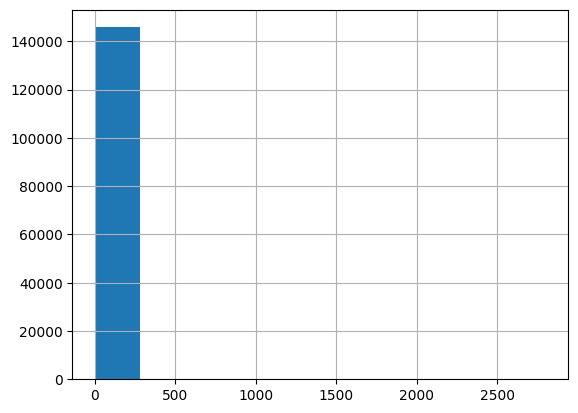

In [6]:
counts = df['Impression'].str.split().str.len()
counts.hist()

In [7]:
counts.min(), counts.max()

(1, 2800)

In [14]:
# labels = ["Fracture", "Edema", "Cardiomegaly", "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion"]
labels = ['urgent', 'phone', 'computer', 'not urgent', 'tablet']
schema = {col_name: pd.Series(dtype="float64") for col_name in labels}
schema["Impression"] = pd.Series(dtype="object")
rdf = pd.DataFrame(schema)
rdf

,urgent,phone,computer,not urgent,tablet,Impression


In [15]:
results = [{'sequence': 'I have a problem with my iphone that needs to be resolved asap!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.9987171292304993,
  0.9945850372314453,
  0.18990309536457062,
  0.0007674154476262629,
  0.00038260864675976336]}]

In [28]:
def to_pandas(results_list):
#     labels = ["Fracture", "Edema", "Cardiomegaly", "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion"]
    labels = ['urgent', 'phone', 'computer', 'not urgent', 'tablet']
    schema = {col_name: pd.Series(dtype="float64") for col_name in labels}
    schema["Impression"] = pd.Series(dtype="object")
    rdf = pd.DataFrame(schema)
    for result in results:
        row = {label: score for label, score in zip(result["labels"], result["scores"])}
        row["Impression"] = result["sequence"]
        rdf = rdf.append(row, ignore_index=True)
    #     rdf = pd.concat([rdf, pd.DataFrame(row)])
    return rdf

pred_df = to_pandas(results)
pred_df

/tmp/ipykernel_7866/3809587057.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rdf = rdf.append(row, ignore_index=True)


,urgent,phone,computer,not urgent,tablet,Impression
0,0.998717,0.994585,0.189903,0.000767,0.000383,I have a problem with my iphone that needs to ...


In [31]:
threshold = 0.9
col_name = "phone"
pred_df[pred_df[col_name] > threshold]

,urgent,phone,computer,not urgent,tablet,Impression
0,0.998717,0.994585,0.189903,0.000767,0.000383,I have a problem with my iphone that needs to ...


In [ ]:
def naive_bayes(y_pred, y_true, col_name):
    X = y_pred[[col_name]]
    y = y_true.mask(y_true != 1, 0)

    nb = GaussianNB()
    nb.fit(X, y)
    # training accuracy
    print(nb.score(X, y))
    print(metrics.classification_report(y, nb.predict(X)))
    return nb

nb_frac = naive_bayes(pred_df, chexbert_df, col_name)